# The bars of Gangelt: Bayesian analysis of the Infection Fatality Rate in Gangelt, and a simple extrapolation to infection-counts in Germany

(Miscellaneous text and maths notes, initiated by Jakob. Feel free to copy paste for the notebook we use, some of it we might want to exclude or put in an appendix or supplement. )

general text now on google doc and deleted here for clarity: 

https://docs.google.com/document/d/1XbVFrzOmm0I0tgdoXTC3jgy3rqf9GZb_Hni54UESBbs/edit

Stuff we mgiht want to read:
https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/bulletins/coronaviruscovid19infectionsurvey/england10may2020

## A Bayesian model of infections and fatalities in Gangelt



[might be a bit long and dry]

We concentrate on estimation of the infection fatality rate (IFR) $\lambda$ in Gangelt, and in a second step we extrapolate to infection-counts in Germany.

For the infection rate $\theta$ in Gangelt, we simply follow the results by Streeck et al 2020, i.e. we do not provide a separate Bayesian analysis for it (see e.g. https://statmodeling.stat.columbia.edu/2020/05/01/simple-bayesian-analysis-inference-of-coronavirus-infection-rate-from-the-stanford-study-in-santa-clara-county/ for a Bayesian analysis of an infection rate of another study). In Streeck et al, the infection rate $\theta$ is estimated as 0.1553 with confidence intervals (0.1231, 0.1896). To preserve this uncertainty estimate, we assume the infection rate to follow a Beta distribution with parameters $\alpha_\theta$ and $\beta_\theta$ which are chosen such that this prior has the same mean and variance, i.e.

$$\theta \sim \mbox{Beta}(\alpha_\theta = ?, \beta_\theta = ?),$$ using the fact that 

$ \mbox{E}(\theta) = \frac{\alpha_\theta}{\alpha_\theta+\beta_\theta}$ and $\mbox{Var}(\theta) = \frac{\alpha_\theta \beta_\theta}{(\alpha_\theta + \beta_\theta)^2(\alpha_\theta + \beta_\theta+1)}$.

In [ ]:
# we could include a little plot here if we want?

We assume that the infection rate in Gangelt can be modelled as a Beta distribution with parameters $\alpha_\theta$ and $\beta_\theta$ which are chosen such that this prior has the desired mean and variance, using the fact that 

$ \mbox{E}(\theta) = \frac{\alpha_\theta}{\alpha_\theta+\beta_\theta}$ and $\mbox{Var}(\theta) = \frac{\alpha_\theta \beta_\theta}{(\alpha_\theta + \beta_\theta)^2(\alpha_\theta + \beta_\theta+1)}$.

We assume that infections in Gangelt occur independently from each other at an infection rate $\theta$, i.e. that the total infection count $I_G$ (for fixed $\theta$) is given by a binomial distribution,

$$ I_G | \theta \sim \mbox{Binomial}(n_G,\theta)$$,

where $N_G$ is the total number of inhabitants in Gangelt, $n_G=?$. Averaged over the uncertainty in the infection rate, this results in the infection count in Gangelt given by a beta-binomial-distribution, 

$$ I_G \sim \mbox{BetaBinomial}(n_G, \alpha_\theta,\beta_\theta  )$$.

We assume that, amongst infected individuals, fatalities occur independently at infection fatality rate $\lambda$, i.e. 

$$ F_G | I_G \sim \mbox{Binomial}(I_G, \lambda)$$, 

which (marginalized over $I_G$) yields a likelihood $P(F_G=f_G| \lambda$), with observed fatality-count $f_G= 7$.

Thus, the likelihood corresponds to a "thinned" beta-binomial distribution (while we did not work out its distributional form, see Wiuff & Stumpf 2006 for a discussion of which distributinos are closed under binomial subsampling). 

[Note Jakob: I am not sure what the functional form of the likelihood is, to be honest-- I dont think that a 'thinned' beta-binomial distribution is still beta-binomial, but honestly I dont quite know. Based on Wiuf and Stumpf 2006, it does not look like the beta-binomial distribution is closed under binomial subsampling-- it is not listed but I also did not work through their conditions. Need to veryfiy or word carefully. Maybe someone can look into this? Matthias? See below]

Finally, we need a prior distribution over $\lambda$. We choose a Beta-distribution with parameters $\alpha_\lambda$ and $\beta_\lambda$, 

$$ \lambda \sim \mbox{Beta}(\alpha_\lambda,\beta_\lambda)$$.

We choose these parameters such that the prior has a mean of $??$, and a variance of $??$, resulting in $\alpha_\lambda =??$ and $\beta_\lambda = ??$. We believe that this provides a reasonable description assuming prior studies in ? and ?, and with a prior variance chosen large enough to not overly constrain the resulting inference. Below, we provide an empirical exploration of how strongly the inference results will be affected if one had chosen different priors, and, using this notebook, it is furthermore possible to further explore different choices of the prior. 

Lots of results to be described...

## Two approximate, simpler likelihoods

[I really like these, but we might want to discuss the actual derivations in an appendix to keep the flow. This section is unfinished, so skip it for now.]

The model describe above provides a simple, yet arguably reasonable generative model of how observed infections and fatalities are related to the underlying infection- and fatality rates. However, Bayesian inference over $\lambda_G$ is complicated by the fact that we do not have a closed-form likelihood, but have to numerically average over $I_G$$. We here provide two approximate models which lead to slightly simpler calculations-- as we will show [hopefully...], the resulting inferences are basically unchanged: 

### Approximating the fatality count by a beta-binomial model

The fatality-count is given by a beta-binomial count under binomial subsampling-- this will, in general, not result in another beta-binomial model (see Wiuf and Stumpf 2006), but it is reasonable to approximate it by a beta-binomial distribution with the same mean and variance. To derive the mean and variance of $F_G$, note that it can be modelled as a random sum of Bernoulli random variables, i.e. 
$ F_G = \sum_{i=1}^{I_G} B_i$, where $B_i \sim \mbox{Bernoulli}(\lambda)$. Thus, 

$$E(F_G) = E(I_G)*\lambda $$ 
and 
$$\mbox{Var}(F_G)= \mbox{E}(\mbox{Var}(F_G| I_G)) + \mbox{Var}(\mbox{E}(F_G| I_G)) = \lambda(1-\lambda)\mbox{E}(\theta) + \lambda^2 \mbox{Var}(I_G) $$, 

where $\mbox{E}(I_G)$ and $\mbox{Var}(I_G)$ are given by the mean and variance of a beta binomial distribution. Thus, having derived the mean and variance of $F_G$, one can approximate the fatality-count distribution by a beta binomial with matching moments. 

[Somoene would need to check the equations, probably at least one error in it,  and also implement the moment matching, but then we have a simply likelihood which I would guess is very close to the true one. There is even a chance it is identical, in which case of course we need to reword the above...]


### Approximating the infection count by a negative-binomial model

The second approximation [which I am yet to work out]  exploits  the fact that the infection count is expected to be substantially lower than the total population size-- in this limit one can approximate the beta-binomial distribution by a negative binomial one, and as the negative binomial distribution is closed under binomial subsampling, the distribution of the fatality count is also negative binomial... one could either use this as a closed-form likelihood, or (possibly) even calculate the posterior analytically.

The pmf of the Beta-Binomial model is given by 
$$ P(k=k | \alpha, \beta, n) = {n \choose k} \frac{B(k+\alpha, n-k+\alpha)}{B(\alpha,\beta)}$$

For large $\beta$, the Beta-function can be approximated by 

$$ B(\alpha,\beta) = \Gamma(\alpha) \beta^{-\alpha}$$

So, 

The negative-binomial distribution is closed under binomial sampling: 
If $ X \sim NB(r,p)$,
$$ P(X=k|r,p) = {k+1-r \choose k} (1-p)^r p^k$$

and is subsampled at rate $q$, then the resulting random variable $X'$ is distributed according to 
$$X' \sim NB(r,p'),$$ 
where $$ \frac{1-p'}{p'}= q\frac{1-p}{p}$$, i.e.
$$ p'= \frac{p}{p+q-qp}$$



[Well, if we do either or both of these approximations, someone should just check empirically both that these models are indeed close approximations, and that it does not look like they are identical... if that is the case then I am probably wrong and the beta-binomial family is closed under binomial subsampling]. Note that the advantage of having an analytical likelihood is that we can very easily use numerical integration to calculate the posterior, otherwise we have to sum over all possible values of $I_G$, which is also fine but a bit annoying. Also, I just enjoyed working through this, so Matthias please do me the favour of checking whether it makes a difference ;-)

## An alternative strategy that might be simpler:

An alternative strategy/sanity check is the following: Suppose that $I_G= i_G$ is fixed for now. Then our model reduces to a simple conjugate model, i.e. the posterior can be calculated analytically:

Our likelihood is 
$$ F_G | i_G \sim \mbox{Binomial}(i_G, \lambda),$$
the prior is
$$ \lambda \sim \mbox{Beta}(\alpha_\lambda, \beta_\lambda),$$ 
so the Posterior is given by 
$$
 \lambda | f_G, i_G \sim \mbox{Beta}(\alpha + f_G, \beta + i_G - f_G).$$
 
This was true for a specific sampled $i_G$, but of course we can marginalize this over all possible $i_G$'s, simply by sampling from the prior over $\theta$, and sampling $i_G$'s from a binomial distribution:

Alright, let me try to implement this myself in scipy:

In [ ]:
import scipy as sp
import numpy as np
from scipy import stats as s
import matplotlib.pyplot as plt

0.1543340380549683
0.01659361899831423
0.12323138014254623
0.18820417043291182


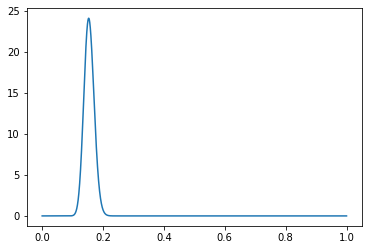

In [4]:
a_lambda, b_lambda = 0.3, 30
lambda_prior = s.beta(a= a_lambda, b= b_lambda)
a_theta, b_theta = 73, 400
theta_prior = s.beta(a= a_theta, b=b_theta)
x = np.linspace(0,1,10001, endpoint= True)
print(theta_prior.mean())
print(np.sqrt(theta_prior.var()))
print(theta_prior.ppf(0.025))
print(theta_prior.ppf(0.975))
fig, ax = plt.subplots(1, 1)
ax.plot(x,theta_prior.pdf(x))

In [5]:
i_G, f_G = 1956, 7
lambda_posterior = s.beta(a = a_lambda + f_G, b = b_lambda + i_G -f_G)
print(lambda_posterior.mean())
print(lambda_posterior.ppf(.025))
print(lambda_posterior.ppf(.975))

0.003675174948396516
0.001514190575864793
0.006773170671493189


In [23]:
# now, lets be really stupid and repeat this process many times:
N = 100
all_pdfs = np.zeros((N,10001))
bounds = np.zeros((N,2))
theta_samples = theta_prior.rvs(size = N)
i_Gs = np.zeros((N,1))
for n in range(N):
    #print(n)
    i_Gs[n] = s.binom.rvs(n = 12597, p = theta_samples[n], size=1)
    #print(theta_samples[n])
    #print(i_Gs[n])
    loc_posterior = s.beta(a = a_lambda + f_G, b = b_lambda + i_Gs[n] -f_G)
    all_pdfs[n,:] = loc_posterior.pdf(x)
    bounds[n,0] = loc_posterior.ppf(0.025)
    bounds[n,1] = loc_posterior.ppf(0.975)
    #print(bounds[n,:])
    

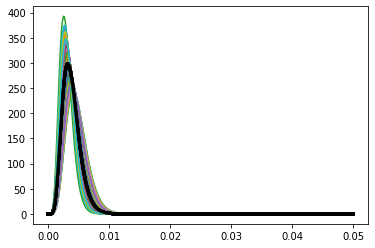

In [35]:
mean_pdf = all_pdfs.mean(axis = 0)
fig, ax = plt.subplots(1, 1)
for n in range(N):
    ax.plot(x[0:500],all_pdfs[n,0:500])
    
    ax.plot(x[0:500],mean_pdf[0:500], linewidth = 3, color = 'black')

In [44]:
# super hackfest to get percentiles:
mean_cdf = np.cumsum(mean_pdf/sum(mean_pdf))
lower_bound = np.argmin(np.abs(mean_cdf -0.025))
lower_bound


15